# Predictive Analytics with Decision Tree

### In this project, I will cover a better understanding of the following topics; 
<ul> 
    <li> Decision Trees </li>
    <li> Decision Trees classifiers </li>
    <li> Evaluate Classifier Performance </li>
    <li> Classification Report </li>

</ul>

## Decision Trees and Building Decision Tree Classifier 
Decision trees are produced by training the algorithm, which identify how to split the data in an optimal way. The algorithm construct the rules based on the relationship between the input data and the target labels in the training data. One of the main goals of decision tree is to reduce the uncertainty when the root node moves towards the leaf notes. Generally, when we see the unknown data points, we are completely uncertain about the output. However, with the decision trees, when we reach the leaf node, we make sure that we are certain about the output. 

Let's see how to construct decision tree and its classifier in Python. Following packages are imported. 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from utilities import visualize_classifier 

I will use the data in the data_decision_trees.txt file, each line contains comma-separated values. The first two values correspond to the input data and the last value corresponds to the target label. Let's load the data from that file:

In [14]:
#Load the input data 
data = pd.read_csv ('/Users/zinpwint/Desktop/Portfolio Projects/Python/Predictive_model_DecisionTree/data_decision_trees.txt')
data.head(5)

,4.86,4.87,0
0,4.69,5.37,0
1,3.82,5.71,0
2,2.58,9.88,1
3,8.30,5.36,1
4,3.41,1.46,1


In [16]:
X = data.iloc[:, :-1].values #features
y = data.iloc[:, -1].values #label 

Separate the input data (X) into two separate classes based on the label (y). 

In [20]:
# Separate input data (X) into two classes depending on the label (y)
class_0 = np.array(X[y==0]) 
class_1 = np.array(X[y==1]) 

Validate this two classes by visualization in scatter plot. 

Text(0.5, 1.0, 'Input data with two classes')

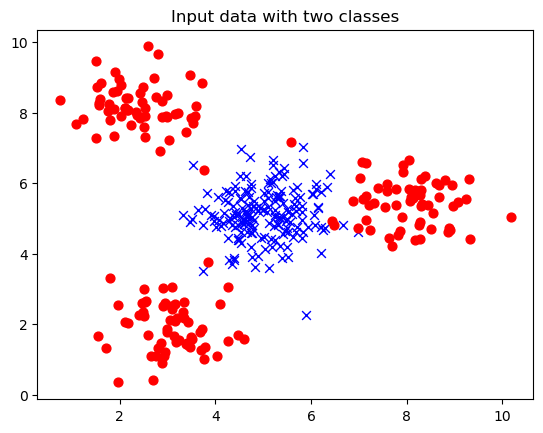

In [38]:
#Visualize the input with two classes 
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s = 40, 
            facecolors = 'blue', linewidth = 1, marker = 'x') 
plt.scatter(class_1[:, 0], class_1[:, 1], s = 40, 
            facecolors = 'red', linewidth = 1, marker = 'o')
plt.title('Input data with two classes') 

#### Splitting data into 'train' and 'test' datasets

In [35]:
# Split data into training and testing datasets. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=5) 
#random_state parameter refers to the seed used by the random number generator required for the initialization of the decision tree classification algorithm.

Building model and visualization decision tree classifier will be based on the training dataset. Let's proceed with decision tree classifier. 

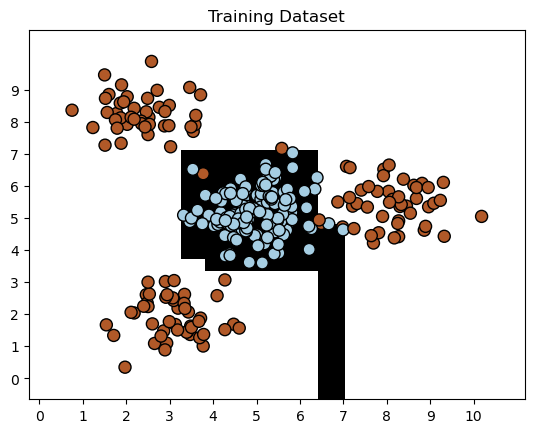

In [37]:
# Decision tree classifier
params = {'random_state':0, 'max_depth':4} #define params 
classifier = DecisionTreeClassifier(**params) #define classifier
classifier.fit(X_train, y_train) #fit the classifier in the training dataset
visualize_classifier(classifier, X_train, y_train, 'Training Dataset') #visualize 

#### Predict Output of the classifier on the testing dataset and visualize 

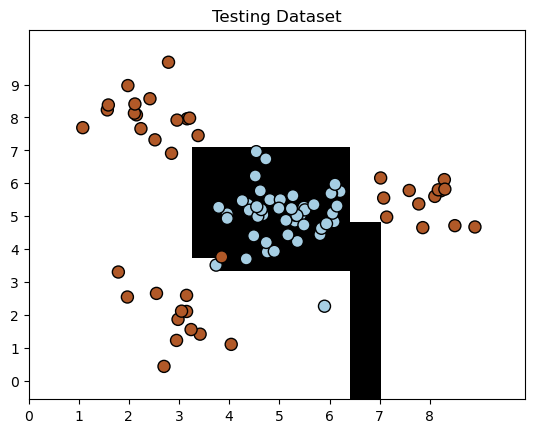

In [39]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Testing Dataset') 

### Evaluate Performance of Classifier

In [43]:
# Evaluate Classifier Performance 
class_names = ['Class_0', 'Class_1'] 
print ("\n" + "#"*40) 
print ("\nClassifier performance on training dataset\n") 
print (classification_report(y_train, 
                             classifier.predict(X_train), target_names = class_names)) 
print ("#"*40 + "\n") 

print ("\n" + "#"*40) 
print ("\nClassifier performance on testing dataset\n") 
print (classification_report(y_test, y_test_pred, target_names = class_names)) 
print ("#"*40 + "\n")

plt.show()


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class_0       0.98      1.00      0.99       131
     Class_1       1.00      0.99      0.99       138

    accuracy                           0.99       269
   macro avg       0.99      0.99      0.99       269
weighted avg       0.99      0.99      0.99       269

########################################


########################################

Classifier performance on testing dataset

              precision    recall  f1-score   support

     Class_0       0.98      0.96      0.97        48
     Class_1       0.95      0.98      0.96        42

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



The performance of the classifier is characterized by 'precision', 'recall', and 'f1 score'. Precision represents the accuracy of the classification, and recall means the numbers of items that were actually retrieved as a percentage of the overall numbers of items that were suppose to be retrieved. Generally, a good classifier has high precision and high recall, but there is usually a trade off between these two. That's why f1-score plays an important role, indicating the balance mean of precision and recall value. 

In this scenario, both precision, recall as well as f1-score is excellent for training and testing dataset. No siginificant overfitting was found, meaning a well generalized model. However, the precision of Class_1 in the testing dataset resulted 0.95 which is relatively lower compared to other results. It indicates that the model could potentially be improved further to handle false positives for this class.